## Reflection of the light

### Reflection at plane surfaces

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Reflection is the phenomenon due to which a light ray reverses its direction on striking a different optical medium. It occurs in different areas of nature, namely light, waves, signal scattering, sonar reflection and so on.<br> 
Some of the earliest accounts of light reflection originate from the ancient Greek mathematician Euclid, who conducted a series of experiments around 300 BC, and appears to have had a good understanding of how light is reflected. However, it wasn't until a millennium and a half later that the Arab scientist Alhazen proposed a law describing exactly what happens to a light ray when it strikes a smooth surface and then bounces off into space.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"Because light behaves in some ways as a wave and in other ways as if it were composed of particles, several independent theories of light reflection have emerged. According to wave-based theories, the light waves spread out from the source in all directions, and upon striking a mirror, are reflected at an angle determined by the angle at which the light arrives. The reflection process inverts each wave back-to-front, which is why a reverse image is observed."

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"According to particle theory, which differs in some important details from the wave concept, light arrives at the mirror in the form of a stream of tiny particles, termed photons, which bounce away from the surface upon impact. Because the particles are so small, they travel very close together (virtually side by side) and bounce from different points, so their order is reversed by the reflection process, producing a mirror image. Regardless of whether light is acting as particles or waves, however, the result of reflection is the same. The reflected light produces a mirror image."

Both quotes are taken from an article written by Thomas J. Fellers and Michael W. Davidson - National High Magnetic Field Laboratory

The laws of reflection are as follows:

1. The incident ray, the reflected ray and the normal to the reflection surface at the point of the incidence lie in the same plane.
2. The angle which the incident ray makes with the normal is equal to the angle which the reflected ray makes to the same normal.
3. The reflected ray and the incident ray are on the opposite sides of the normal.

![Reflections](images\reflections.jpg)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this research we will simulate specular reflection and we will explore the behavior of the light rays when they colide with flat and spherical mirrors.
A mirror provides the most common model for specular light reflection.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The angular approach was used for calculating the reflection angle. 
We 
We get the $i_{emitter}$ from the Light ray itself. Afterwards we calculate the normal angle which is giving:

$$ i_{normal} = i_{mirror} + 90^\circ$$


$$  i_{reflected} =  i_{normal} + (i_{normal} - i_{emitter})$$

The reason why is simplicity of the approach and the fact that in any moment it needs to be checked if the light is touching the mirror.
Moreover in the experiment with the convex mirror it needs some virtual (imaginary) light rays to be created and this would make the code very complex and confusing to the reader.


The law of reflection can also be equivalently expressed using linear algebra. The direction of a reflected ray is determined by the vector of incidence and the surface normal vector. 
![Reflection](images\reflection.jpg)

It can be expressed as follows :

We need to find:
1. Vector projection of incoming light ray onto the normal of the mirror.
2.  Vector projection of incoming light ray onto the mirror itself.

By definition the formula of vector projection of $\vec{i}$ onto $\vec{n}$ is: $$ proj_{n}i=\frac{\vec{i} \cdot \vec{n}}{\parallel \vec{n} \parallel^2}\vec{n} =\frac{\vec{i} \cdot \vec{n}}{\vec{n} \cdot \vec{n}}\vec{n}$$

To remove the denominator, we get a vector of magnitude one in the same direction as $\vec{n}$.:
$$ \hat{n} = \frac{n}{\parallel n \parallel}$$

The projections of $\vec{i}$ to the normal ($\vec{n}$) and to the plane of the mirror are needed.
The projection of $\vec{i}$ in the $\vec{n}$ direction is given by:

$$ proj_{n}i = \left(\vec{i}\cdot \hat{n}\right)\hat{n} $$ and the projection of $\vec{i}$ onto the mirror itself can be expressed as follows:

$$ proj_{mirror}i = \vec{i}−\left(\vec{i}\cdot \hat{n}\right)\hat{n}$$

Then we have:

$$\vec{i} = \left(\vec{i}\cdot \hat{n}\right)\hat{n} + \left(\vec{i}−\left(\vec{i}\cdot \hat{n}\right)\hat{n} \right)$$

Than the reflected vector $\vec{r}$  has −1 times the projection onto <b>n</b> that $\vec{i}$ has onto <b>n</b>, while the orthogonal projection of $\vec{r}$ onto the mirror is equal to the orthogonal projection of $\vec{i}$ onto the mirror. Therefore: 

$$\vec{r} = -\left(\vec{i}\cdot \hat{n}\right)\hat{n} + \left(\vec{i}−\left(\vec{i}\cdot \hat{n}\right)\hat{n} \right)$$

$$\vec{r} = \vec{i} - 2 \left( \vec{i} \cdot \hat{n} \right)\hat{n}$$

And solved for $\vec{n}$ this becomes:

$$ \vec{r} = \vec{i} - 2\frac{\vec{i}\cdot \vec{n}}{\parallel \vec{n} \parallel^2}\vec{n} $$

In terms of Python code it can be writen like this:
```python
                    r = i - ((2 * np.dot(i, n)) / np.linalg.norm(n) ** 2) * n 

```


### Implementation

For the current project was used:
 - Python programming language 
 - Jupyter Notebook
 - Matplotlib
 - Numpy
 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To simulate light, was created a custom class called Ray which extends Polygon from matplotlib.patches library.
It has one method called <b>update_position</b>. As one can assume, it updates the location of the moving end of the light ray.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A Mirror class was created to simulate a physical mirror. It has various methods to detect process and reflect the light rays to the right directions. 
Because of the second experiment it is made so that a mirror can be created by its start and end point.
It has to calculate it's origin point (the pivot).

```python
self.pivot = [(self.start_pt[0] +self.end_pt[0])/2,(self.start_pt[1] + self.end_pt[1])/2]
``` 

It has to calculate it's legth.
Here was used Pythagoras theorem : $$C^2=A^2+B^2 \equiv C=\sqrt{A^2+B^2}$$



<u><b>example:</b></u>

```python
 self.length = np.sqrt((end_pt[1]-start_pt[1]) ** 2 + (end_pt[0] - start_pt[0])** 2)
```



It also has to calculate its endpoints after rotation.
    Here was used the relation between Polar and Cartesian coordinate systems.

$$x = r cos{\theta}$$
$$y = r sin{\theta}$$
        
where $\theta$ is the angle of the mirror itself and $r$ is the half of the mirror length.
    
<u><b>example:</b></u>

```python
d_start_x = self.pivot[0]+(np.cos(np.deg2rad(self.angle)))* self.length / 2
d_start_y = self.pivot[1]+(np.sin(np.deg2rad(self.angle)))* self.length / 2
```
 

The class uses the same principals to calculate its <b>normal</b> which has main role in calculation of the reflection.<br>
There is <b>"is_intersecting"</b> method which checks if a light ray collides with the mirror.<br>
There, in case of multiple mirror setup , after a ray hits the first mirror , it becoms the light source for the second mirror. 

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle
from matplotlib.patches import Polygon
from matplotlib.path import Path
from matplotlib.patches import Arc

import matplotlib.lines as mlines
from matplotlib import animation, rc
import numpy as np
import math
import random
from IPython.display import HTML
from matplotlib.path import Path

### Mirror class
This class is representing physical mirror or reflector.

It is used to handle the reflections of the light rays.

In [3]:
class Mirror(mlines.Line2D):
    
    def __init__(self, number, start_pt , end_pt, emitter_angle, angle, color = None):
        mlines.Line2D.__init__(self, [start_pt[0], end_pt[0]], [start_pt[1],end_pt[1]])
        self.start_pt = start_pt
        self.end_pt = end_pt
        self.angle = angle
        self.emitter_angle = emitter_angle
        self.start_x = start_pt[0]
        self.start_y = start_pt[1]
        
        #Using Pythagoras theorem to find the middle point (the pivot) of the mirror
        self.length = np.sqrt((end_pt[1]-start_pt[1]) ** 2 + (end_pt[0] - start_pt[0]) ** 2)
        self.number = number
        
        # Find midpoint to use it as a pivot point and the start pint of the normal itself"""
        self.pivot = [(self.start_pt[0] + self.end_pt[0]) / 2,
                      (self.start_pt[1] + self.end_pt[1]) / 2]
        self.rotate()
        self.normal_angle = 90 + self.angle
        self.normal = self.determine_normal()
        if color is not None:
            self.set_color(color)
               
    
    def get_refl_angle(self,emitter_angle):
        """Finding the angle of reflection according the emitter angle"""
        return self.normal_angle + ( self.normal_angle- emitter_angle)
    

    def rotate(self):
        """Rotate the mirror according the angle from the initial data"""
        d_start_x = self.pivot[0] + (np.cos(np.deg2rad(self.angle))) * self.length / 2
        d_start_y = self.pivot[1] + (np.sin(np.deg2rad(self.angle))) * self.length / 2
        d_end_x = self.pivot[0] + (-np.cos(np.deg2rad(self.angle))) * self.length / 2
        d_end_y = self.pivot[1] + (-np.sin(np.deg2rad(self.angle))) * self.length / 2
        self.update_coordinates([d_start_x, d_start_y], [d_end_x, d_end_y])


    def update_coordinates(self,s_pt,e_pt):
        """Update the coordinates"""
        self.start_pt = s_pt
        self.end_pt = e_pt
        self.set_xdata([s_pt[0], e_pt[0]])
        self.set_ydata([s_pt[1], e_pt[1]])


    def determine_normal(self):
        """Determining the normal of reflector, which is bisector of the angle of reflection"""
        det_end_pt = [self.pivot[0] + (np.cos(np.deg2rad(self.normal_angle))) * 5 ,
                      self.pivot[1] + (np.sin(np.deg2rad(self.normal_angle))) * 5]
        return  mlines.Line2D([self.pivot[0], det_end_pt[0]], [self.pivot[1], det_end_pt[1]])

    # Given three collinear points p, q, r, the function checks if
    # point q lies on line segment 'pr'
    def on_segment(self, p, q, r):
        if ((q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))):
            return True
        return False

   

    def is_intersecting(self,ray_start_pt, ray_end_pt):
        """Checking whether the ray moving tip is on the mirror surface"""
        p1 = self.start_pt
        p2 = self.end_pt
        p3 = ray_start_pt
        p4 = ray_end_pt

        # Find the 4 orientations required for
        o1 = self.orientation(p1, p2, p3)
        o2 = self.orientation(p1, p2, p4)
        o3 = self.orientation(p3, p4, p1)
        o4 = self.orientation(p3, p4, p2)

        # General case
        if o1 != o2 and o3 != o4:
            return True

        # Special Cases
        # p1 , p2 and p3 are collinear and p3 lies on segment p1-p2
        if (o1 == 0) and self.on_segment( p1, p3, p2):
            return True
        # p1 , p2 and p4 are collinear and p4 lies on segment p1-p2
        if (o2 == 0) and self.on_segment( p1, p4, p2):
            return True
        # p3 , p4 and p1 are collinear and p1 lies on segment p3-p4
        if (o3 == 0) and self.on_segment( p3, p1, p4):
            return True
        # p3 , p4 and p2 are collinear and p2 lies on segment p3p4
        if (o4 == 0) and self.on_segment( p3, p2, p4):
            return True
        # If none of the cases
        return False
    
    def orientation(self, p, q, r):
        """ to find the orientation of an ordered triplet (p,q,r)
        function returns the following values:
        0 : Collinear points
        1 : Clockwise points
        2 : Counterclockwise"""

        val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1]))
        if val > 0:
            # Clockwise orientation
            return 1
        elif val < 0:
            # Counterclockwise orientation
            return 2
        else:
            # Collinear orientation
            return 0

### Ray class
This class is representing physical ray of light

In [4]:
class Ray(Polygon):
    """A class representing a light ray"""
    def __init__(self, number, start_pt, end_pt, angle, color = None, style = None):
        Polygon.__init__(self, [start_pt, end_pt], closed = False)
        self.start_pt = start_pt
        self.end_pt = end_pt
        self.angle = angle
        self.collided = False
        self.color = 'orange'

        if color is not None:
            self.set_color(color)
 
        if style is not None:
            self.set_linestyle(style)

        self.set_linewidth(1)
        self.number = number
        self.vertices = 2
        self.refl_count = 0
        self.fill = False
        self.mirror_no = 0


    def update_position(self, end_pos):
        """Updating position of the end point of the ray"""
        self.end_pt[0] += end_pos[0]
        self.end_pt[1] += end_pos[1]
        self.vertices += self.refl_count
        data = self.get_xy()

        # Determine whether there is new vertex to be created or just update the last one
        if self.vertices <= len(data):
            data[self.vertices-1] = self.end_pt
            self.set_xy(data)
        else:
            self.set_xy(np.concatenate((data,[self.end_pt])))

### Simulation of specular reflection

Here was set up a simple scene to demonstarte specular reflection.
This optical phemomena obeys the same principles as mirror reflection. The function <b>calculate_reflection(ray, normal) </b> was used to calculate the reflected twins of the lightray's emitting points. 

In [5]:
def calculate_reflection(ray, normal):
    """Finding the reflection point of the given one according the normal of the mirror"""
    i = np.array(ray)
    n = np.array(normal)
    # The normal should be normalized to get the unit vector
    n_norm  = n / np.linalg.norm(n)
    r = i - ((2 * np.dot(i, n)) / np.linalg.norm(n) ** 2) * n 
    return -r

/home/boyko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/home/boyko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


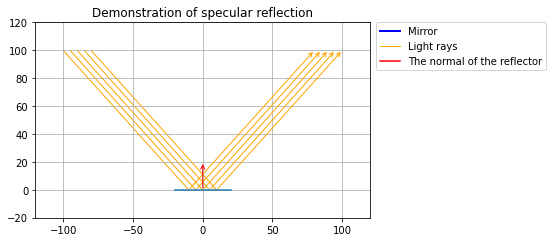

In [6]:
#Starting point
s_points = np.array([[-100, 100], [-95, 100], [-90, 100],[-85, 100], [-80, 100]])
e_points = np.array([[-10, 0], [-5, 0], [0,0],[5, 0], [10, 0]])
norm =  [0, 20]

# Creating a plane horisontal mirror
f_mirror = Mirror(1, [-20, 0], [20,0], 0, 0)

#Setup the canvas
fig ,ax = plt.subplots()
ax.add_line(f_mirror)
plt.xlim(-120, 120)
plt.ylim(-20, 120)

refl_pts = np.zeros((5,2), dtype=float)

#Creating rays
b_count = len(s_points)-1
for i in range(len(s_points)):
    
    #Calculating the reflected position of the start point
    refl_pts[b_count] = calculate_reflection([s_points[i]], norm)[0]
    ax.add_line(Ray(i+1 , s_points[i], e_points[i], 0, 'orange'))
    b_count -= 1
    
    
for i in range(len(e_points)):
    r = Ray(i+6, e_points[i], refl_pts[i],0,'orange')
    plt.annotate(s='', xy=refl_pts[i], xytext=e_points[i], arrowprops=dict(arrowstyle='->',color = 'orange'))
    
ax.annotate(s='', xy=norm, xytext=[0,0], arrowprops=dict(arrowstyle='->',color = 'red'))

ax.set_aspect("equal")
ax.set_title('Demonstration of specular reflection')
legend_elements = [mlines.Line2D([0], [0], color = 'blue', lw = 2, label = 'Mirror'),
                   mlines.Line2D([0], [0], color = 'orange',lw = 1 , label = 'Light rays'),
                   mlines.Line2D([0], [0], color = 'red',lw = 1.5, label = 'The normal of the reflector'),
                  ]
legend = plt.legend(handles = legend_elements, loc = 'lower right',bbox_to_anchor=(1.54, 0.73))
 
plt.grid()
plt.show()

### Retroreflector

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A retroreflector is a device or surface that reflects radiation (usually light) back to its source with minimum scattering. This works at a wide range of angle of incidence, unlike a planar mirror, which does this only if the mirror is exactly perpendicular to the wave front, having a zero angle of incidence. Being directed, the retroflector's reflection is brighter than that of a diffuse reflector. Corner reflectors, and Cat’s eye reflectors are the most used kinds.
It uses the light reflection principles and it has many applications such as : 

- Roads: road surfaces, road signs, vehicles, and clothing
- On the Moon: Astronauts on the Apollo 11, 14, and 15 missions left retroreflectors on the Moon as part of the Lunar Laser Ranging Experiment.
- In satelites:  Many artificial satellites carry retroreflectors so they can be tracked from ground stations.
- Ships, boats, emergency gear
- GIS: as a reflector which returns light rays to the receiver, which caluculates distance to to the target.

### Experiment

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will obsereve the behavior of light rays , which are striking a retrolefrector.
There is a simple retrolefrector in 2D plane also called corner reflector. We will use two mirrors which make an angle of $90^{\circ}$

##### Hypotesis
The light ray reflected from the retroleflector will be colinear to the original one, coming from the lighsource and will return back to the source.


### Reflection at flat mirrors



In [7]:
#reflector positions
mirror1_angle = 90
mirror2_angle = 0

#Creating reflector objects
mirror1 = Mirror(0, [80, 0], [100, 0], 0, mirror1_angle)
mirror2 = Mirror(1, [70, -10], [90, -10], 0, mirror2_angle)
mirrors = [mirror1, mirror2]

#Creating the ligh rays
r1 = Ray(1, [30., 60.], [30., 60.], 223, color = 'red')
r2 = Ray(2, [10., 20.], [10., 20.], 203, color = 'orange')
r3 = Ray(2, [70., 70.], [70., 70.], 255, color = 'green')

m_rays = [r1,r2,r3]

#Setup the canvas
fig_light ,ax_light = plt.subplots()
ax_light.set_xlim(0, 100)
ax_light.set_ylim(-20, 80)
ax_light.set_aspect("equal")
plt.title("Demonstration of a retroreflector principle")
#adding the light rays and the reflectors to the scene
for rr in m_rays:
    ax_light.add_line(rr)

for mm in mirrors:
    ax_light.add_line(mm)

legend_elements = [mlines.Line2D([0], [0], color = 'blue', lw = 2, label = 'Mirror'),
                   mlines.Line2D([0], [0], color = 'red', lw = 1 , label = 'Light ray'),
                   mlines.Line2D([0], [0], color = 'green', lw = 1 , label = 'Light ray'),
                   mlines.Line2D([0], [0], color = 'orange', lw = 1 , label = 'Light ray')
                  ]
legend = ax_light.legend(handles = legend_elements, loc = 'lower right',bbox_to_anchor=(1.4, 0.65))
plt.close()    
def animate(i):
    for c_ray in m_rays:
        processing_angle = 180-c_ray.angle 
        if not c_ray.collided :
            #Updating the coordinates of the moving end of the light ray
            x_upd = 0.3 * np.cos(np.deg2rad(processing_angle))
            y_upd = 0.3 * np.sin(np.deg2rad(processing_angle))
            c_ray.update_position([x_upd, y_upd])
            
            #Checking if the light ray is colliding with some of the registered mirrors
            for mirror in mirrors:
                if mirror.is_intersecting(c_ray.end_pt, c_ray.start_pt):
                    c_ray.collided = True
                    c_ray.refl_count += 1
                    c_ray.mirror_no = mirror.number
                 
        else:
          reflection_angle =  mirrors[c_ray.mirror_no].get_refl_angle(c_ray.angle)
          c_ray.angle = reflection_angle - 180
          c_ray.collided = False

            
photon_anim = animation.FuncAnimation(fig_light, animate, frames = 600, interval=15)
rc('animation', html='html5')
photon_anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

### Reslults from the test

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the animation above is seen that after bouncing from the two mirrors, the light rays direction is collinear to the initial one. This is happening because the sum of the reflected angles for a single light ray is equal to $180^\circ $.
#### Conclusion
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If the retrolefrector itself is small enough and the beam of light is precisly pointed to it , the reflected light will return exactly to it's starting point (to the emitter).

###  Reflection at spherical mirrors


A spherical mirror is a reflecting surface which forms a part of a sphere. When the reflection takes place from the inner surface and outer surface is polished or silvered the mirror is known as concave mirror. Vice-versa, it is convex.

![Concave convex image](images\concave_convex.jpg)


### Concave mirror

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Rays that lie close to the principal axis are called <b>paraxial rays</b>. 
When <b> the paraxial rays</b> hit a concave mirror they reflect inwards towards a focal point (F). Each individual ray is still reflecting at the same angle as it hits that small part of the surface.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"Rays that are far from the principal axis do not converge to a single
point. The fact that a spherical mirror does not bring all parallel
rays to a single point is known as <b>spherical abberation</b>."
The quote is taken from a lecture published on a website [The Reflection of
Light: Mirrors ](https://www.asc.ohio-state.edu/humanic.1/p1201lecture15.pdf)  of College of arts and sciences - Ohio

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The inside curve of a spoon is an example of a concave mirror.<br>
Concave mirrors are used in certain types of astronomical telescopes called reflecting telescopes. The mirrors condense lots of light from faint sources in space onto a much smaller viewing area and allow the viewer to see far away objects and events in space that would be invisible to the naked eye.
Light rays travel towards the mirror in a straight line and are reflected inwards to meet at a point called the focal point.
Concave mirrors are useful for make-up mirrors because they can make things seem larger. This concave shape is also useful for car headlights and satellite dishes.


### Convex mirror


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convex mirrors curve outwards, like the outside of a balloon.<br>
When parallel light rays hit a convex mirror they reflect outwards and travel directly away from an imaginary focal point (F). Each individual ray is still reflecting at the same angle as it hits that small part of the surface.
If imaginary lines are traced back, they appear to come from a focal point behind the mirror.
Convex mirrors are useful for shop security and rear-view mirrors on vehicles because they give a wider field of vision.

#### Characteristics of reflection by a spherical reflecting surfaces


1.  (P) is taken as the midpoint of reflecting surface, also known as Pole.
2.  (C) is the center of the sphere of which the mirror is part.
3.  The radius of the mirror is the distance between P and C.
4.    Principal Axis is the straight line passing through the pole (P) and the center of the mirror (C).
5.    (F) focal point is the point of intersection of all the reflected rays which strike the mirror collinear to the principal axis.
In concave mirror it is real and in the convex mirror it is virtual.
6.  Focal length is the distance from pole to focal point.

### Experiment

The following experiment explores behavior of the light rays striking  spherical mirror.

The statements to test are:

1. If the incident ray is collinear to the principal axis, the reflected ray passes through the focal point.
2. The focal point is placed the half distance between the center (C) and the pole (P) in other words:

$$F = R/2$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Two scenes are setup. One with concave mirror and another one with convex mirror. For simplicity is assumed a single light source. In both cases the light is coming from left side of the mirror. 
In both scenes  are set points which are representing the focal points. The location were precisly chosen to be exactly the half distance between the center of the mirror and the pole(P).
All ther light rays will be collinear to the principal axes.

1. The expectations for concave mirror are the light rays to be reflected and every one of them to go through the preseted focal point.     

2. For the convex case the expectations are when the rays bounse out from the mirror their "virtual" backward projection to go through the presetted focal point



#### Implementation

The current implementation is using classes Ray and Mirror as well as previous one.
The main function which is processing the movement of the lightrays and is handeling the reflections is called <b>"process_ray_movement"</b>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It's complexity can be explained by the fact that it is used by both cases - the concave and convex mirror case. It was done this way, to avoid code repetition.

### Utility functions 
These are utiliy functions which serve to the spherical mirror implementations 

In [8]:

def get_rays():
    """Creating a set of light rays used for the visualizations"""
    return [Ray(0, [-100,6], [-100,6], 180, 'orange'), Ray(1, [-100,12], [-100,12], 180, 'orange'),
              Ray(2, [-100,18], [-100,18], 180, 'orange'), Ray(3, [-100,-6], [-100,-6], 180, 'orange'),
              Ray(4, [-100,-18], [-100,-18], 180, 'orange'), Ray(5, [-100,-12], [-100,-12], 180, 'orange')]

def get_angle(pt1, pt2):
    """Getting an angle between two points"""
    dy = pt2[1] - pt1[1]
    dx = pt2[0] - pt1[0]
    theta = np.arctan2(dy, dx) * 180 / np.pi
    if theta < 0:
        theta = 360 + theta
    return theta

def construct_mirror(mirror_segments):
    """Construct a virtual mirror"""
    mirror = []
    for i in range(len(mirror_segments)) :
        segment = mirror_segments[i]
        ang = get_angle(segment[1], segment[0])
        m = Mirror(i ,segment[0], segment[1], 0, ang, 'grey')
        mirror.append(m)
    return mirror

def get_arc(center, radius, theta1, theta2, resolution=30, **kwargs):
    """generate the points of the segment of an arc and return the path related to the polygon"""
    theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
    points = np.vstack((radius * np.cos(theta) + center[0],
                        radius * np.sin(theta) + center[1]))
    # build the polygon and add it to the axes
    poly = Polygon(points.T, closed=False, **kwargs)
    return poly.get_path()

def find_curve_segments(path):
    """Get the curve segments to use their end points as points of mirror segments"""
   
    poly, = path.to_polygons()
    poly_count = len(poly,)
    segments = []
    for s in range(poly_count):
        if s + 2 < poly_count:
            segments.append([poly[s], poly[s+1]])
    return segments

def process_and_visualize_rays(ax, mirrors,is_convex):
    """Triggers the evaluation of the rays during their movement"""
    rays = get_rays();
    for r in rays:
        for f in range(0,700):
            process_ray_movement(r,mirrors,is_convex)
        ax.add_line(r)

def set_plot(ax, path):
    """Setting up the plot for the current path"""
    ax.set_facecolor('black')
    ax.set_xlim(-130,60)
    ax.set_ylim(-60,60)
    ax.set_aspect("equal")
    shape = patches.PathPatch(path,edgecolor='white',facecolor='none', lw=3)
    ax.add_patch(shape)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
    
def get_principal_axis():
    return  mlines.Line2D([-100,50],[0,0],linewidth=0.75,linestyle='dashed',color='white')



#### The main function

It processes the movement of the light rays and checks wheteher there are colissions with the mirrors

In [9]:
helper_rays = []

def process_ray_movement(c_ray , c_mirrors,is_convex):
    """Main function to process the direction of a light ray"""
    processing_angle = 180-c_ray.angle 
    if not c_ray.collided :
            #Updating the coordinates of the moving end of the light ray
            x_upd = 0.3 * np.cos(np.deg2rad(processing_angle))
            y_upd = -0.3 * np.sin(np.deg2rad(processing_angle))
            c_ray.update_position([x_upd,y_upd])
            
            #Checking if the light ray is colliding with some of the registered mirrors
            for mirror in c_mirrors:
                if mirror.is_intersecting(c_ray.end_pt, c_ray.start_pt):
                    c_ray.collided = True
                    c_ray.refl_count += 1
                    c_ray.mirror_no = mirror.number
                 
    else:
          reflection_angle =  c_mirrors[c_ray.mirror_no].get_refl_angle(c_ray.angle)
          updated_x = 0.3 * np.cos(np.deg2rad(reflection_angle))
          updated_y = 0.3 * np.sin(np.deg2rad(reflection_angle))
          c_ray.update_position([updated_x,updated_y])
          """If current ray is part of the convex case , we have to create virtual rays which are
              going into the sphere and passing through the virtual focal point"""  
          if is_convex:
            x_upd = 0.3 * -np.cos(np.deg2rad(reflection_angle))
            y_upd = 0.3 * -np.sin(np.deg2rad(reflection_angle))
            helper_ray = hr_contains(c_ray.number)
            if hr_contains(c_ray.number) is not None:
                helper_ray.update_position([x_upd ,y_upd])
            else:
                h = Ray(c_ray.number,[c_ray.end_pt[0],c_ray.end_pt[1]],
                        [c_ray.end_pt[0]+x_upd ,c_ray.end_pt[1]+y_upd],
                        reflection_angle,color='green',style='dashed')
                
                helper_rays.append(h)
                ax_convex.add_line(h)
                
                
 
def hr_contains(number):
    """Returning a virtual light ray by given number if existing in the list"""
    for hr in helper_rays:
        if hr.number == number:
            return hr
    return None

def plot_text(axe, pt_x, pt_y, text):
    axe.text(pt_x, pt_y, text, color = 'white', fontsize = 15)



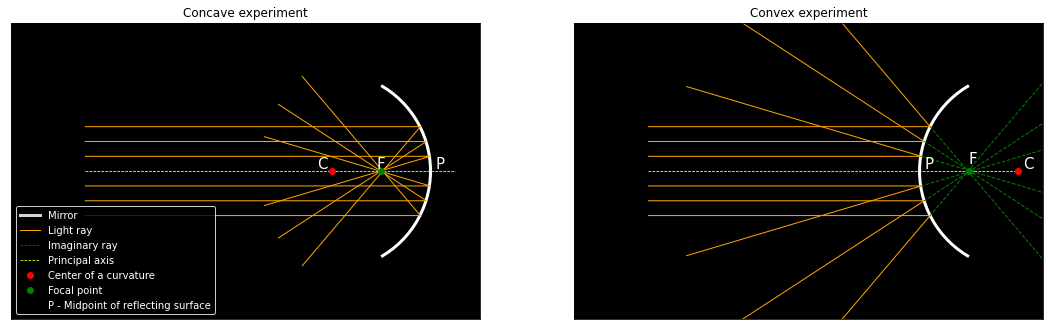

In [10]:
#Base data of the shape of the mirrors
concave_center = [0, 0]
convex_center = [50, 0]
concave_path = get_arc(concave_center, 40, -60, 60)
convex_path = get_arc(convex_center, 40, 120, 240)

#Define the matplotlib figure and the two plots 
fig_sphere ,(ax_concave, ax_convex) = plt.subplots(1, 2)
fig_sphere.set_size_inches(18.5, 10.5)

#Initializing the mirror plots
set_plot(ax_concave,concave_path)
set_plot(ax_convex,convex_path)
ax_concave.set_title("Concave experiment")
ax_convex.set_title("Convex experiment")

#Setting the principal axis"""
ax_concave.add_line(get_principal_axis())
ax_concave.plot(concave_center[0], concave_center[1], "o", color='r')
ax_concave.plot(concave_center[0] + 20, concave_center[1], "o", color='g')

#Plotting texts for concave case
plot_text(ax_concave, concave_center[0] - 6, concave_center[1] + 1, "C")
plot_text(ax_concave,concave_center[0] + 18, concave_center[1] + 1, "F")
plot_text(ax_concave,concave_center[0] + 42, concave_center[1] + 1, "P")

ax_convex.add_line(get_principal_axis())
ax_convex.plot(convex_center[0], convex_center[1],"o",color='r')
ax_convex.plot(convex_center[0] - 20, concave_center[1],"o",color='g')

#Plotting texts for convex case
plot_text(ax_convex, convex_center[0] + 2, convex_center[1] + 1, "C")
plot_text(ax_convex, convex_center[0] - 20, convex_center[1] + 3, "F")
plot_text(ax_convex, convex_center[0] - 38, convex_center[1] + 1, "P")

#Get the curve segments to use their end points as points of concave mirror segments
concave_mirror_segments = find_curve_segments(concave_path)

#Get the curve segments to use their end points as points of convex mirror segments
convex_mirror_segments = find_curve_segments(convex_path)

#Creating a set of mirror segments in a shape of concave mirror
concave_mirror = construct_mirror(concave_mirror_segments)

#Creating a set of mirror segments in a shape of convex mirror
convex_mirror = construct_mirror(convex_mirror_segments)

process_and_visualize_rays(ax_convex,convex_mirror,True)
process_and_visualize_rays(ax_concave,concave_mirror,False)

#Constructing the legend
legend_elements = [mlines.Line2D([0], [0], color = 'lightgray', lw = 3, label = 'Mirror'),
                   mlines.Line2D([0], [0], color = 'orange',lw = 1 , label = 'Light ray'),
                   mlines.Line2D([0], [0], color = 'green',lw = 0.75,linestyle = 'dashed', label = 'Imaginary ray'),
                   mlines.Line2D([0], [0], color = 'yellow',lw = 0.75,linestyle = 'dashed', label = 'Principal axis'),
                   
                   mlines.Line2D([0], [0], marker = 'o', color = 'black',linestyle = None,\
                                 label = 'Center of a curvature', markerfacecolor = 'r', markersize = 8),
                   
                   mlines.Line2D([0], [0], marker = 'o', color = 'black', linestyle = None,\
                                 label =  'Focal point', markerfacecolor = 'g', markersize = 8),
                   
                   patches.Patch(color='none',label = "P - Midpoint of reflecting surface")
                  ]
legend = ax_concave.legend(handles = legend_elements, loc = 'lower left')
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('black')
for text in legend.get_texts():
    text.set_color("white")

#### Results for concave case
As it is shown on the left scene , all the light rays are collinear and close to the principle axis.This makes them  <b>paraxial rays</b>. All the rays after their reflection went through the focal point (F). The conclusion is that the tested statements were confirmed by this experiment.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The experiment confirms some of the results stated in the article [Spherical mirrors](http://farside.ph.utexas.edu/teaching/302l/lectures/node136.html), written by Richard Fitzpatrick - Professor of Physics - The University of Texas at Austin in year 2007

#### Results for convex case
As it is shown on the right scene , all the ligh trays are colinear to the principle axis. All the "virtual" rays after the reflection of the original ones , went through the focal point (F). The conclusion is that the tested statements were confirmed by this experiment.

### References:

1. [Spherical mirrors written by Richard Fitzpatrick](http://farside.ph.utexas.edu/teaching/302l/lectures/node136.html)
2. [The Reflection of
Light: Mirrors ](https://www.asc.ohio-state.edu/humanic.1/p1201lecture15.pdf) -  College of arts and sciences - Ohio
3. [Wikipedia - Reflection (physics)](https://en.wikipedia.org/wiki/Reflection_(physics)#Reflection_of_light)
4. [Wikipedia - Vector projection](https://en.wikipedia.org/wiki/Vector_projection)
5. Khan academy
6. sciencelearn.com
7. artofproblemsolving.com
8. thelearningpoint.net
9. stackoverflow.com
10. math.stackexchange.com
